In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Параметр squeeze=True загружает набор данных в ивде объекта Series
fb1 = pd.read_csv('C:/Users/Kotos/Desktop/football_deaths.csv', header=0, index_col=1, parse_dates=True)

In [3]:
# Список колонок с типами данных
fb1.dtypes

row_id                    int64
player_name              object
player_country           object
team_country             object
player_age              float64
player_team_name         object
incident_description     object
heart_related             int64
cardiac_related           int64
collapsed                 int64
lightning                 int64
collision                 int64
dtype: object

In [4]:
# Удаление строк, содержащих пустые значения
fb1 = fb1.dropna(axis=0, how='any')

In [5]:
fb1.head()

,row_id,player_name,player_country,team_country,player_age,player_team_name,incident_description,heart_related,cardiac_related,collapsed,lightning,collision
incident_date,,,,,,,,,,,,
1889-01-13,1,William Cropper,England,England,26.0,Staveley,Ruptured bowel in a match against Grimsby Town...,0,0,0,0,0
1892-01-11,2,James Dunlop,Scotland,Scotland,21.0,St Mirren,Tetanus from fall on piece of glass in a frien...,0,0,0,0,0
1893-11-12,3,John Henry Morris,England,England,26.0,Shrewsbury Town,Internal haemorrhage following a bad tackle in...,0,0,0,0,0
1893-11-23,4,Walter Bannister,England,England,24.0,Chesterfield Town,Rupture of the kidney from a tackle in game ag...,0,0,0,0,0
1896-03-28,5,Teddy Smith,England,England,27.0,Bedminster,Suffered severe concussion following a clash o...,0,0,0,0,0


In [6]:
fb1.drop(columns=['row_id'], inplace=True)
fb1.drop(columns=['player_name'], inplace=True)
fb1.drop(columns=['player_country'], inplace=True)
fb1.drop(columns=['team_country'], inplace=True)
fb1.drop(columns=['player_team_name'], inplace=True)
fb1.drop(columns=['incident_description'], inplace=True)
fb1.drop(columns=['heart_related'], inplace=True)
fb1.drop(columns=['cardiac_related'], inplace=True)
fb1.drop(columns=['collapsed'], inplace=True)
fb1.drop(columns=['lightning'], inplace=True)
fb1.drop(columns=['collision'], inplace=True)

fb1.head()

,player_age
incident_date,
1889-01-13,26.0
1892-01-11,21.0
1893-11-12,26.0
1893-11-23,24.0
1896-03-28,27.0


In [7]:
# Размер временного ряда
fb1.shape

(212, 1)

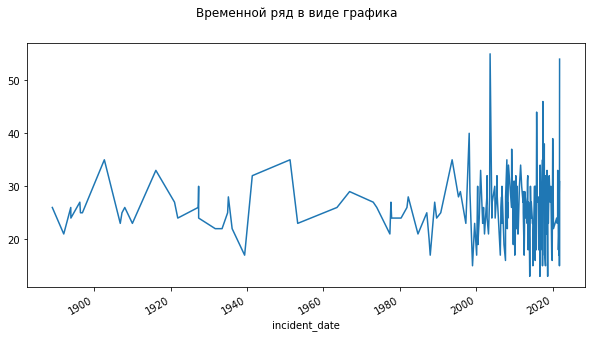

In [8]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
fb1.plot(ax=ax, legend=False)
pyplot.show()

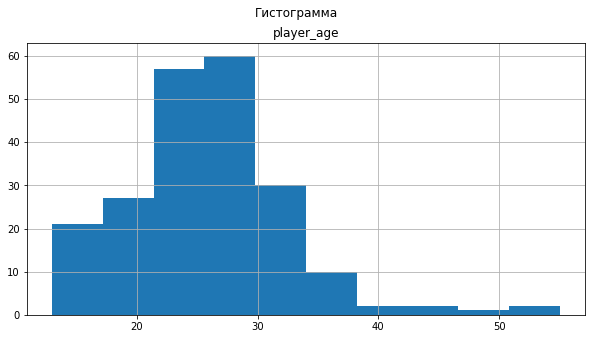

In [9]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
fb1.hist(ax=ax, legend=False)
pyplot.show()

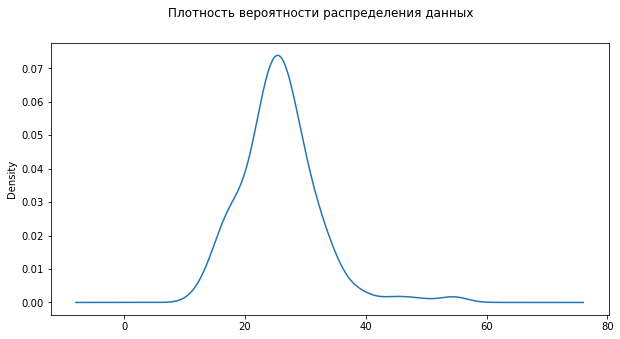

In [10]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
fb1.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

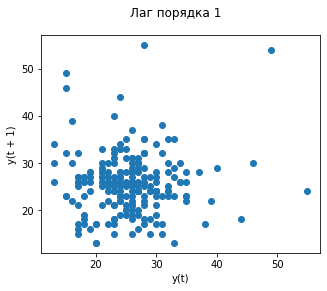

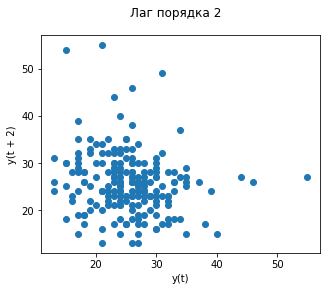

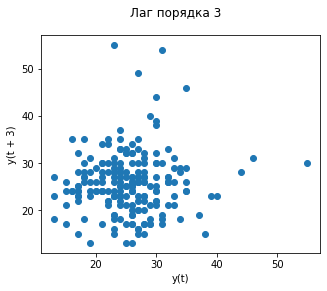

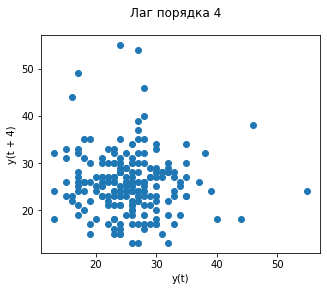

In [11]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(fb1, lag=i, ax=ax)
    pyplot.show()

In [12]:
#Прогнозирование временного ряда авторегрессионными методами

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
# Целочисленная метка шкалы времени 
xnum = list(range(fb1.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = fb1['player_age'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]

In [14]:
# Параметры модели (p,d,q) 
arima_order = (6,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])


In [15]:
mean_squared_error(test, predictions_arima, squared=False)

9.127632301857364

In [16]:
mean_absolute_error(test, predictions_arima)

6.662114685047538

In [17]:
# Записываем предсказания в DataFrame
fb1['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)

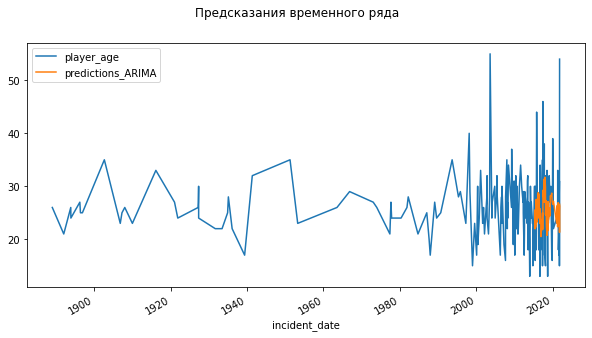

In [18]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
fb1.plot(ax=ax, legend=True)
pyplot.show()

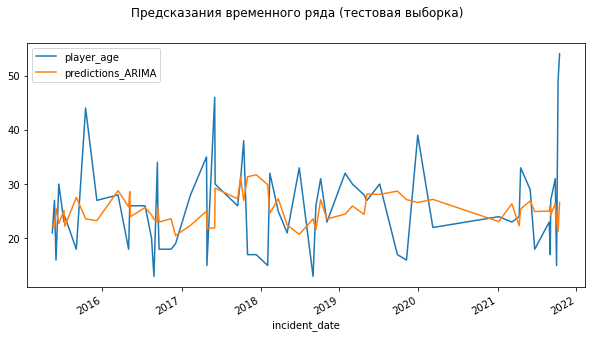

In [19]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
fb1[train_size:].plot(ax=ax, legend=True)
pyplot.show()

In [20]:
#Прогнозирование временного ряда методом символьной регресии
from gplearn.genetic import SymbolicRegressor
function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=500, metric='mse',
                               generations=70, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-100, 100), random_state=0)

In [21]:
est_gp.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))

C:\Users\Kotos\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65      2.51478e+51       81          572.801              N/A      1.46m
   1   162.19      1.20331e+10       60          59.9215              N/A     38.30s
   2   199.16      6.25197e+09       51          53.4245              N/A     42.46s
   3    93.50      8.66565e+15       85           53.236              N/A     26.16s
   4    73.28      1.19963e+11       47          48.4524              N/A     24.10s
   5    60.59      1.70052e+11      119          42.3059              N/A     21.43s
   6    52.70      1.08167e+06      121          38.1006              N/A     21.08s
   7    68.06      1.68778e+06       60          30.6134              N/A     22.11s
   8    81.80      1.38757e+06       97          27.8279              N/A  

SymbolicRegressor(const_range=(-100, 100),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=70, init_depth=(4, 10), metric='mse',
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

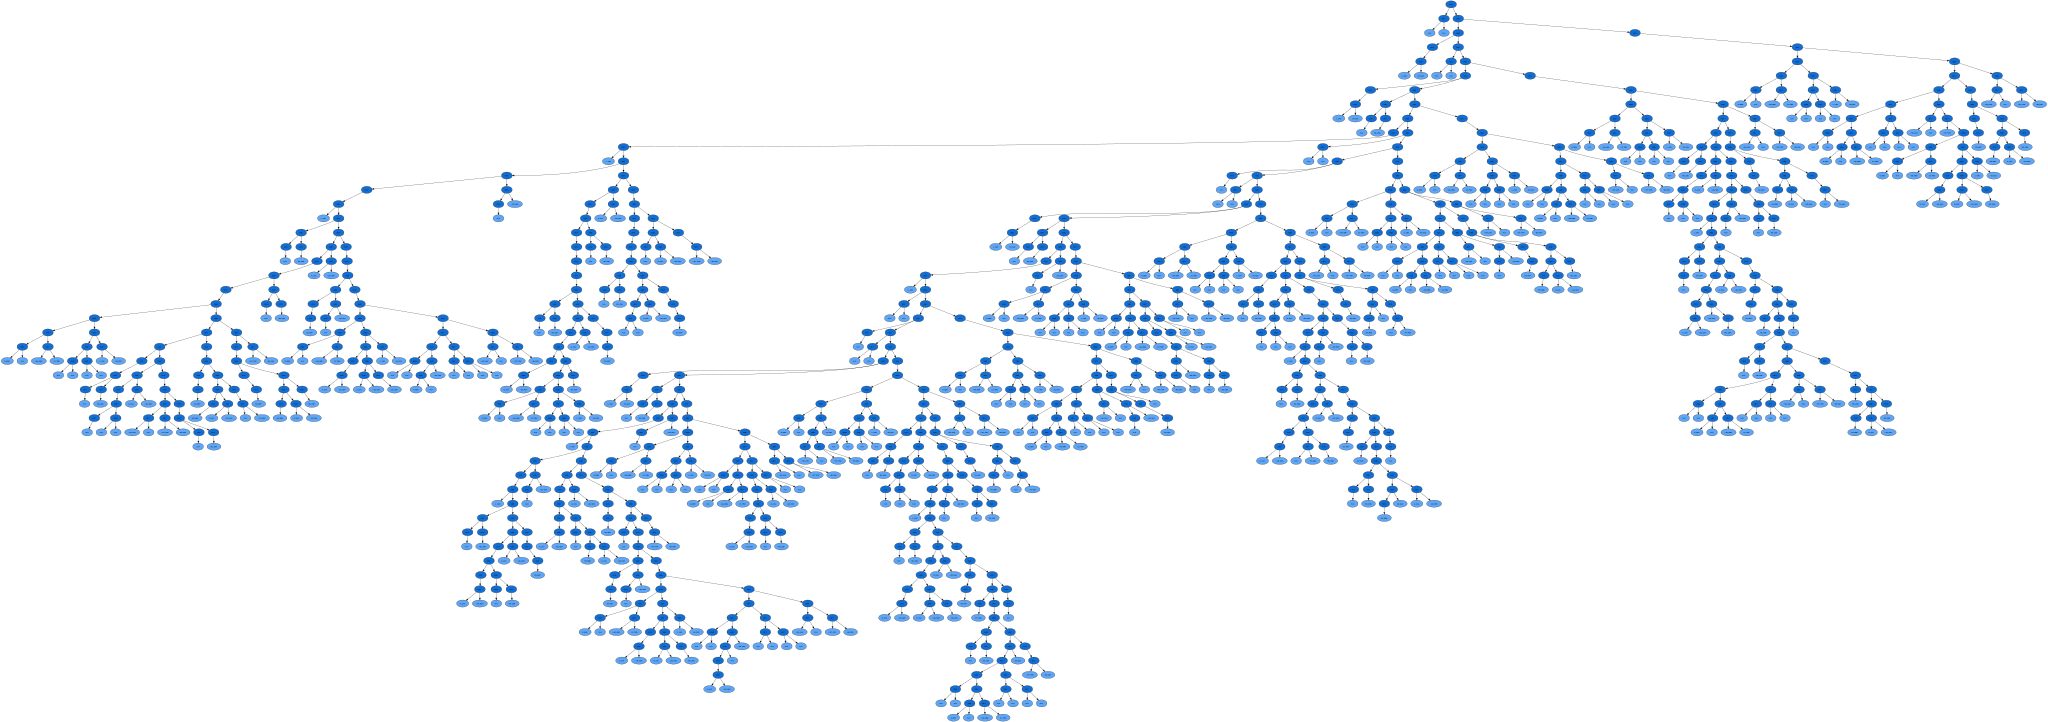

In [22]:
import graphviz
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [23]:
# Предсказания
y_gp = est_gp.predict(np.array(xnum_test).reshape(-1, 1))
y_gp[:10]

array([26.93150408, 20.51407244, 23.03378212, 24.88491732, 24.91471153,
       24.46211528, 24.98907304, 23.98251182, 24.0624372 , 24.49985905])

In [24]:
# Записываем предсказания в DataFrame
fb1['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_gp)

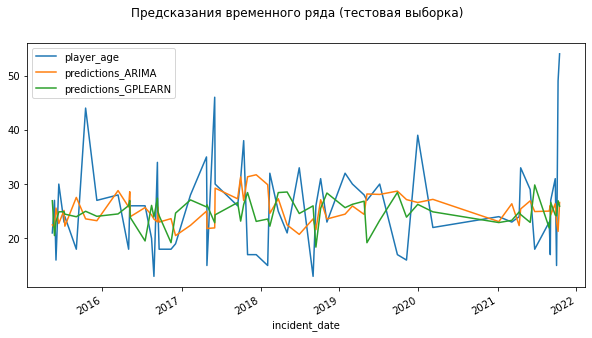

In [25]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
fb1[train_size:].plot(ax=ax, legend=True)
pyplot.show()

In [26]:
mean_squared_error(test, y_gp, squared=False)

8.781967060445695

In [27]:
mean_absolute_error(test, y_gp)

6.808934649709078